In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
# Importing the Boston Housing dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [3]:
data = pd.DataFrame(housing.data)

In [4]:
data

,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [5]:
data.head()

,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [6]:
data.columns = housing.feature_names

data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [7]:
data['PRICE'] = housing.target

In [8]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [9]:
data[data.isnull().any(axis=1)]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE


In [10]:
# Spliting target variable and independent variables
X = data.drop(['PRICE'], axis = 1)
y = data['PRICE']

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=4)

In [12]:
model = LinearRegression()

In [13]:
model.fit(X_train,y_train)

LinearRegression()

In [14]:
model.intercept_

-36.92588429884586

In [15]:
y_pred = model.predict(X_train)

In [16]:
from sklearn import metrics
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.6081901093734017
Adjusted R^2: 0.6079730251483852
MAE: 0.5319076620403789
MSE: 0.5258454910434389
RMSE: 0.7251520468449627


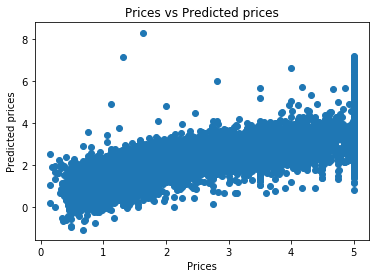

In [17]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

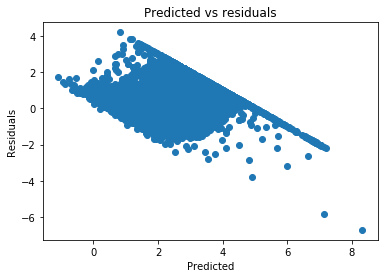

In [18]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

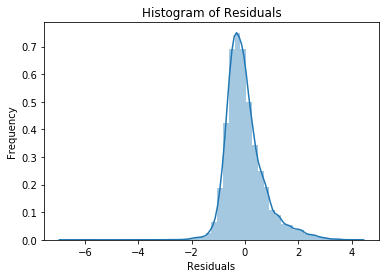

In [19]:
import seaborn as sns
# Checking Normality of errors
sns.distplot(y_train-y_pred)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

In [20]:
!pip install pycaret

  Using cached numba-0.54.1-cp37-cp37m-win_amd64.whl (2.3 MB)
  Using cached llvmlite-0.37.0-cp37-cp37m-win_amd64.whl (17.0 MB)
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.31.0


ERROR: Cannot uninstall 'llvmlite'. It is a distutils installed project and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.


In [21]:
from pycaret.regression import *
reg1 = setup(data = data, target = 'PRICE')

,Description,Value
0,session_id,6642
1,Target,PRICE
2,Original Data,"(20640, 9)"
3,Missing Values,False
4,Numeric Features,8
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(14447, 8)"


In [23]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.3124,0.2197,0.4685,0.8339,0.1421,0.1778,0.1750
et,Extra Trees Regressor,0.3268,0.2501,0.4998,0.8110,0.1477,0.1832,0.8960
rf,Random Forest Regressor,0.3281,0.2548,0.5046,0.8075,0.1505,0.1870,1.6340
gbr,Gradient Boosting Regressor,0.3668,0.2834,0.5321,0.7859,0.1624,0.2108,0.7690
dt,Decision Tree Regressor,0.4572,0.5155,0.7173,0.6100,0.2110,0.2504,0.0410
ridge,Ridge Regression,0.5312,0.5310,0.7284,0.5991,0.2247,0.3181,0.0080
br,Bayesian Ridge,0.5313,0.5309,0.7283,0.5991,0.2247,0.3181,0.0100
lr,Linear Regression,0.5312,0.5310,0.7284,0.5990,0.2247,0.3181,0.5060
lar,Least Angle Regression,0.5312,0.5310,0.7284,0.5990,0.2247,0.3181,0.0080
omp,Orthogonal Matching Pursuit,0.6253,0.6972,0.8347,0.4731,0.2603,0.3871,0.0070


In [24]:
import numpy as np
lgbms = [create_model('lightgbm', learning_rate = i) for i in np.arange(0.1,1,0.1)]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.3869,0.3125,0.5590,0.7436,0.1778,0.2243
1,0.4081,0.3448,0.5872,0.7437,0.1858,0.2349
2,0.3856,0.3182,0.5641,0.7542,0.1778,0.2277
3,0.3884,0.3134,0.5598,0.7566,0.1769,0.2164
4,0.4160,0.3531,0.5942,0.7407,0.1890,0.2605
5,0.3889,0.3228,0.5681,0.7679,0.1769,0.2248
6,0.3981,0.3283,0.5730,0.7522,0.1813,0.2296
7,0.3819,0.3179,0.5638,0.7599,0.1787,0.2208
8,0.3928,0.3353,0.5791,0.7499,0.1834,0.2196
9,0.3869,0.3043,0.5516,0.7741,0.1802,0.2306


In [25]:
# Importing module and initializing setup 
from pycaret.regression import * 
reg1 = setup(data = data, target = 'PRICE')
# train a decision tree model
lgbms = create_model('lightgbm')
# tune hyperparameters of decision tree
tuned_lgbms = tune_model(lgbms)
# tune hyperparameters with increased n_iter
tuned_lgbms = tune_model(lgbms, n_iter = 50)
# tune hyperparameters to optimize MAE
tuned_lgbms = tune_model(lgbms, optimize = 'MAE') #default is 'R2'
# tune hyperparameters with custom_grid
params = {"max_depth": np.random.randint(1, (len(data.columns)*.85),20),
          "max_features": np.random.randint(1, len(data.columns),20),
          "min_samples_leaf": [2,3,4,5,6],
          "criterion": ["gini", "entropy"]
          }
tuned_lgbms_custom = tune_model(lgbms, custom_grid = params)


,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.3239,0.2255,0.4749,0.8239,0.1445,0.1830
1,0.3308,0.2317,0.4814,0.8344,0.1509,0.1925
2,0.3175,0.2247,0.4740,0.8316,0.1451,0.1834
3,0.3223,0.2373,0.4871,0.8302,0.1445,0.1775
4,0.3168,0.2038,0.4515,0.8484,0.1422,0.1829
5,0.3208,0.2202,0.4693,0.8238,0.1442,0.1795
6,0.3146,0.2240,0.4733,0.8267,0.1403,0.1689
7,0.3110,0.2193,0.4683,0.8340,0.1409,0.1749
8,0.3186,0.2435,0.4935,0.8056,0.1495,0.1897
9,0.3240,0.2352,0.4850,0.8184,0.1469,0.1891


In [27]:
# tune multiple models dynamically
# top3 = compare_models(n_select = 3)
# tuned_top3 = [tune_model(i) for i in top3]

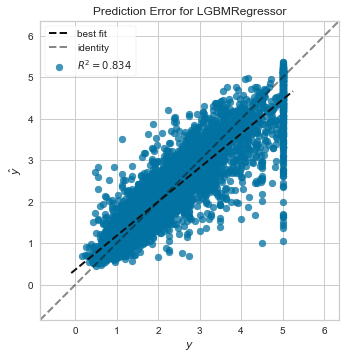

In [31]:
plot_model(tuned_lgbms,plot='error')

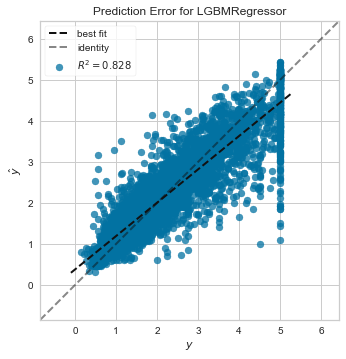

In [32]:
plot_model(tuned_lgbms_custom,plot='error')

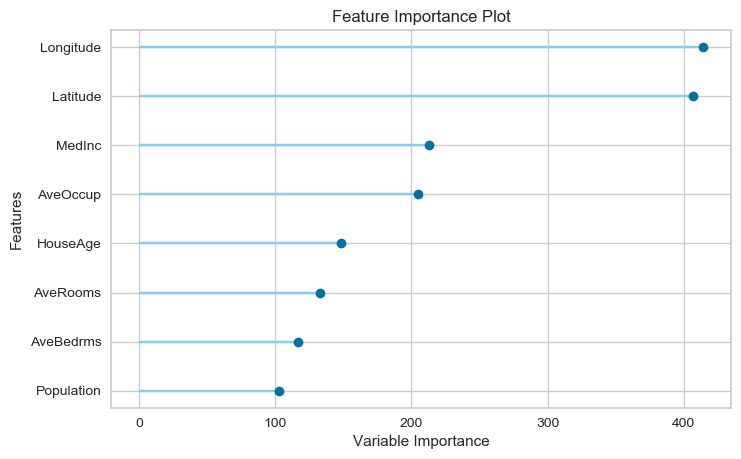

In [33]:
plot_model(tuned_lgbms, plot='feature')

In [36]:
y_pred_tuned = predict_model(tuned_lgbms)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,0.3128,0.2261,0.4755,0.8342,0.1412,0.1711


In [40]:
print(y_pred_tuned.shape)
print(y_pred.shape)



(6193, 10)
(14448,)


In [47]:
y_pred_tuned = tuned_lgbms.predict(X_test)

In [48]:
print(y_pred_tuned.shape)

(6192,)


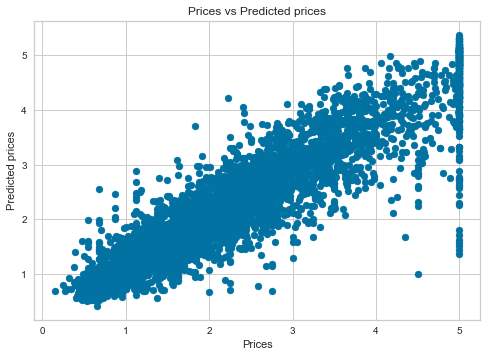

In [49]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_test, y_pred_tuned)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

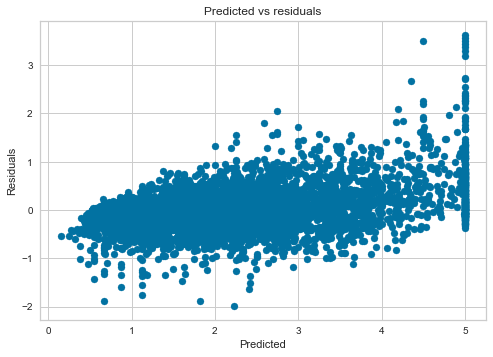

In [50]:
# Checking residuals
plt.scatter(y_test,y_test-y_pred_tuned)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

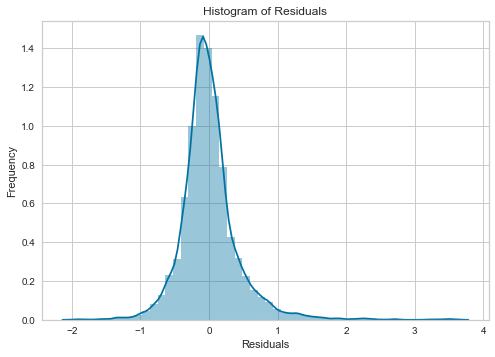

In [51]:
import seaborn as sns
# Checking Normality of errors
sns.distplot(y_test-y_pred_tuned)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

In [53]:

final_lightgbm = finalize_model(tuned_lgbms)
print(final_lightgbm)

LGBMRegressor(bagging_fraction=0.5, bagging_freq=0, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0, feature_fraction=0.9,
              importance_type='split', learning_rate=0.15, max_depth=-1,
              min_child_samples=36, min_child_weight=0.001, min_split_gain=0.1,
              n_estimators=60, n_jobs=-1, num_leaves=30, objective=None,
              random_state=5619, reg_alpha=0.3, reg_lambda=0.2, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [54]:
save_model(final_lightgbm,'Final LightGBM Model for California_Housing_Prediction 15Dec2021')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='PRICE',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy='...
                                colsample_bytree=1.0, feature_fraction=0.9,
                                importance_type='split', learning_rate=0.15,
                                max_depth=-1, min_child_samples=36,
                                min_child_weight=0.001, min_split_gain=0.1,
                